In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')

In [46]:
import numpy as np
from sklearn import model_selection

indexes = np.random.randint(70000, size=1000)

data = mnist.data[indexes]
#print(data.shape)
target = mnist.target[indexes]

xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
    data, target, train_size=0.8
)


In [3]:
from sklearn import neighbors

k = 10

clf = neighbors.KNeighborsClassifier(k)
clf.fit(xtrain, ytrain)

probas = clf.predict_proba(xtest)

In [4]:
from sklearn import datasets
import matplotlib.pyplot as plt

itest = 4

images = data.reshape((-1, 28, 28))
plt.imshow(images[itest],cmap=plt.cm.gray_r,interpolation="nearest")
plt.show()

print(probas[itest])

<Figure size 640x480 with 1 Axes>

[0.  0.  0.  0.  0.  0.  0.  0.9 0.  0.1]


In [5]:
#clf.score(xtest, ytest)
found_classes = clf.predict(xtest)

In [6]:
for itest in range(1,20):
    #itest = 4
    
    res =  " OK" if ytest[itest] == found_classes[itest] else ""

    print("Classe : " + ytest[itest] + " / " + found_classes[itest] + res)

Classe : 6 / 6 OK
Classe : 6 / 6 OK
Classe : 4 / 4 OK
Classe : 7 / 7 OK
Classe : 6 / 6 OK
Classe : 4 / 4 OK
Classe : 4 / 4 OK
Classe : 3 / 3 OK
Classe : 4 / 4 OK
Classe : 3 / 3 OK
Classe : 3 / 3 OK
Classe : 3 / 3 OK
Classe : 4 / 9
Classe : 9 / 9 OK
Classe : 8 / 3
Classe : 5 / 5 OK
Classe : 1 / 1 OK
Classe : 0 / 0 OK
Classe : 4 / 4 OK


In [7]:
# BAD

from sklearn.model_selection import KFold

scores_k = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)    
    kf = KFold(n_splits=nb_splits, shuffle=True)

    

    for train_indexes, test_indexes in kf.split(data):
        # Calcul des xtest/ytest/xtrain/ytrain
        xtrain = data[train_indexes]
        xtest = data[test_indexes]
        ytrain = target[train_indexes]
        ytest = target[test_indexes]
    
        clf.fit(xtrain, ytrain)
        
        print(".", end = '')
        scores_k[k] += clf.score(xtest, ytest) / nb_splits
        
    
    print(scores_k[k])

..........0.9214
..........0.9334
..........0.9288000000000001
..........0.9328000000000001
..........0.9288
..........0.9242
..........0.9249999999999999
..........0.9274
..........0.9211999999999999
..........0.9216
..........0.9206
..........0.9154
..........0.9136
..........0.9156000000000001


In [23]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores_k2 = [0 for i in range(0,16)]

nb_splits = 10

# k = Nombre de voisins à considérer
for k in range(2,16):
    clf = neighbors.KNeighborsClassifier(k)
    #clf.fit(xtrain, ytrain)
    
    score = np.mean(cross_val_score(clf, xtrain, ytrain, cv=10))

    print("K = " + str(k) + " -> " + str(score))
    scores_k2[k] = score


K = 2 -> 0.916877546651403
K = 3 -> 0.9277556099686157
K = 4 -> 0.9264634160137637
K = 5 -> 0.9290913722184866
K = 6 -> 0.9266685080303665
K = 7 -> 0.9282261641036813
K = 8 -> 0.9242347194876575
K = 9 -> 0.9244589033810291
K = 10 -> 0.9237849785557692
K = 11 -> 0.921558996547651
K = 12 -> 0.9182166996658638
K = 13 -> 0.9159957691965088
K = 14 -> 0.9142208059217346
K = 15 -> 0.9155468437182226


[0, 0, 0.9214, 0.9334, 0.9288000000000001, 0.9328000000000001, 0.9288, 0.9242, 0.9249999999999999, 0.9274, 0.9211999999999999, 0.9216, 0.9206, 0.9154, 0.9136, 0.9156000000000001]


Text(0.5, 1.0, 'Score pour différentes valeurs de k')

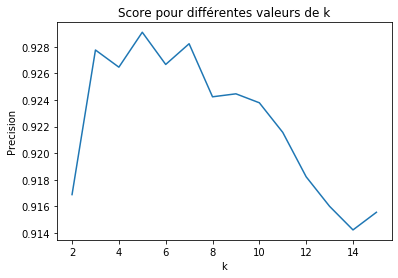

In [24]:
print(scores_k)

#plt.plot([x for x in range(2, 16)], scores_k[2:])
plt.plot([x for x in range(2, 16)], scores_k2[2:])

#plt.legend(['KFold', 'cross_val_score'], loc='upper right')
plt.xlabel("k")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de k")

#sklearn tsne

# Résultat

Pour la suite, on prends la valeur k=5

In [25]:
from sklearn import neighbors

k=5
rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

scores_rate = []
for rate in rates:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    #print(str(len(ytrain)) + " - - - " + str(rate))
    score = clf.score(xtest, ytest)
    
    #score = np.mean(cross_val_score(clf, xtest, ytest, cv=10))

    print("Rate = " + str(rate) + " -> " + str(score))
    scores_rate.append(score)    

Rate = 0.1 -> 0.8308888888888889
Rate = 0.2 -> 0.8715
Rate = 0.3 -> 0.8891428571428571
Rate = 0.4 -> 0.912
Rate = 0.5 -> 0.9188
Rate = 0.6 -> 0.9195
Rate = 0.7 -> 0.922
Rate = 0.8 -> 0.932
Rate = 0.9 -> 0.932


Text(0.5, 1.0, 'Score pour différents pourcentages consacrés au train(k=5)')

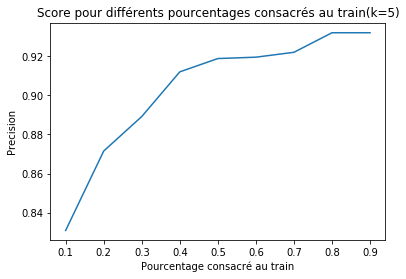

In [26]:
plt.plot([x for x in rates], scores_rate)

plt.xlabel("Pourcentage consacré au train")
plt.ylabel("Precision")
plt.title("Score pour différents pourcentages consacrés au train(k=" + str(k) +")")


# Résultat
Plus on alloue de données à l'entrainement, plus l'algorithme est efficace pour la classification.

In [36]:
from sklearn import neighbors

k=5
rate=0.8

# De 400 à 8000
sizes = [200*i for i in range(1, 51)]

scores_size = []
for size in sizes:
    
    indexes2 = np.random.randint(70000, size=size)

    data2 = mnist.data[indexes2]
    target2 = mnist.target[indexes2]

    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data2, target2, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("Size = " + str(size) + " -> " + str(score))
    scores_size.append(score)

Size = 200 -> 0.6
Size = 400 -> 0.775
Size = 600 -> 0.825
Size = 800 -> 0.85
Size = 1000 -> 0.9
Size = 1200 -> 0.8625
Size = 1400 -> 0.8857142857142857
Size = 1600 -> 0.88125
Size = 1800 -> 0.925
Size = 2000 -> 0.8975
Size = 2200 -> 0.8931818181818182
Size = 2400 -> 0.8979166666666667
Size = 2600 -> 0.9038461538461539
Size = 2800 -> 0.9232142857142858
Size = 3000 -> 0.9083333333333333
Size = 3200 -> 0.9125
Size = 3400 -> 0.8955882352941177
Size = 3600 -> 0.9111111111111111
Size = 3800 -> 0.9355263157894737
Size = 4000 -> 0.9225
Size = 4200 -> 0.9214285714285714
Size = 4400 -> 0.9125
Size = 4600 -> 0.9184782608695652
Size = 4800 -> 0.9114583333333334
Size = 5000 -> 0.925
Size = 5200 -> 0.9346153846153846
Size = 5400 -> 0.9296296296296296
Size = 5600 -> 0.9392857142857143
Size = 5800 -> 0.9267241379310345
Size = 6000 -> 0.9166666666666666
Size = 6200 -> 0.9451612903225807
Size = 6400 -> 0.9265625
Size = 6600 -> 0.9409090909090909
Size = 6800 -> 0.9367647058823529
Size = 7000 -> 0.94
Size

Text(0.5, 1.0, "Score pour différentes tailles d'échantillon")

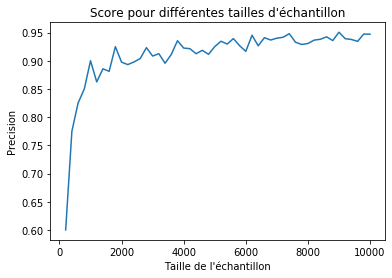

In [37]:
plt.plot([x for x in sizes], scores_size)

plt.xlabel("Taille de l'échantillon")
plt.ylabel("Precision")
plt.title("Score pour différentes tailles d'échantillon")


# Résultat
Plus la taille de l'échantillon est importante, plus la précision de l'algorithme est grande.

In [47]:
from sklearn import neighbors

k=5
rate = 0.8
ps = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
scores_p = []

for p in ps:
    xtrain, xtest, ytrain, ytest = model_selection.train_test_split(
        data, target, train_size=rate
    )

    clf = neighbors.KNeighborsClassifier(k, p=p)
    clf.fit(xtrain, ytrain)
    
    score = clf.score(xtest, ytest)

    print("P = " + str(p) + " -> " + str(score))
    scores_p.append(score)    

P = 1 -> 0.835
P = 2 -> 0.85
P = 3 -> 0.86
P = 4 -> 0.865
P = 5 -> 0.84
P = 6 -> 0.82
P = 7 -> 0.88
P = 8 -> 0.845
P = 9 -> 0.835
P = 10 -> 0.845


Text(0.5, 1.0, 'Score pour différentes valeurs de p(k=5)')

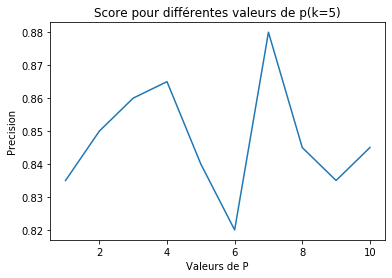

In [48]:
plt.plot([x for x in ps], scores_p)

plt.xlabel("Valeurs de P")
plt.ylabel("Precision")
plt.title("Score pour différentes valeurs de p(k=" + str(k) +")")


# Résultat

Augmentation de la précision en augmentant la norme utilisée